# EDA Hotel Booking Demand

![](hotel.jpeg)

Kumpulan data ini berisi informasi pemesanan untuk hotel kota dan hotel resor, dan mencakup informasi seperti kapan pemesanan dibuat, lama menginap, jumlah orang dewasa, anak-anak, dan/atau bayi, dan jumlah tempat parkir yang tersedia, dan lain lain. 

Semua informasi pengenal pribadi telah dihapus dari data.


source kaggle : https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('hotel.csv')

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Fitur Data
0. Hotel : Jenis Hotel (City Hotel, Resort hotel)
1. is_canceled : 1 (batal booking), 0 (tidak dibatalkan)
2. lead_time : jarak waktu (hari) antara tanggal pemesanan dengan tgl kedatangan
3. arrival_date_year : tahun tamu datang ke hotel
4. arrival_date_month : bulan tamu datang ke hotel
5. arrival_date_week_number : nomor Minggu tahun untuk tanggal kedatangan
6. arrival_date_day_of_month : Hari tanggal kedatangan
7. stays_in_weekend_nights : Jumlah malam tamu menginap diakhir pekan
8. stays_in_week_nights : Jumlah malam (Senin sampai Jumat) tamu menginap atau memesan untuk menginap di hotel
9. adults : Jumlah tamu orang dewasa
10. children : Jumlah tamu anak-anak
11. babies : Jumlah tamu bayi
12. meal : tipe paket makan tamu
13. country : asal negara tamu 
14. market_segment : jenis pemasaran hotel, “TA” (Travel Agents) dan “TO” (Tour Operators)
15. distribution_channel : Booking distribution channel
16. is_repeated_guest : pemesanan berasal dari tamu yang berulang (1) atau bukan (0)
17. previous_cancellations : Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini
18. previous_bookings_not_canceled : Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan sebelum pemesanan saat ini
19. reserved_room_type : type kamar yang dipesan
20. assigned_room_type : type kamar yang digunakan
21. booking_changes : perubahan yang dilakukan pada pemesanan dari saat pemesanan dimasukkan pada PMS hingga saat check-in atau pembatalan
22. deposit_type : tipe deposit / uang muka
23. agent : ID agen travel yang melakukan pemesanan
24. company : ID perusahaan/badan yang melakukan pemesanan atau bertanggung jawab untuk membayar pemesanan
25. days_in_waiting_list : Jumlah hari pemesanan dalam daftar tunggu sebelum dikonfirmasi ke pelanggan
26. customer_type : type customer
27. adr : Average Daily Rate , rata rata harga kamar
28. required_car_parking_spaces : Jumlah ruang parkir mobil yang dibutuhkan oleh pelanggan
29. total_of_special_requests : Jumlah permintaan khusus yang dibuat oleh pelanggan (misalnya bad twin atau lantai atas)
30. reservation_status : status akhir reservasi
31. reservation_status_date : tanggal status akhir reservasi ditetapkan

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [10]:
df['reservation_status_date'].unique()

array(['2015-07-01', '2015-07-02', '2015-07-03', '2015-05-06',
       '2015-04-22', '2015-06-23', '2015-07-05', '2015-07-06',
       '2015-07-07', '2015-07-08', '2015-05-11', '2015-07-15',
       '2015-07-16', '2015-05-29', '2015-05-19', '2015-06-19',
       '2015-05-23', '2015-05-18', '2015-07-09', '2015-06-02',
       '2015-07-13', '2015-07-04', '2015-06-29', '2015-06-16',
       '2015-06-18', '2015-06-12', '2015-06-09', '2015-05-26',
       '2015-07-11', '2015-07-12', '2015-07-17', '2015-04-15',
       '2015-05-13', '2015-07-10', '2015-05-20', '2015-05-12',
       '2015-07-14', '2015-06-17', '2015-05-01', '2015-03-30',
       '2015-07-19', '2015-06-03', '2015-06-26', '2015-05-14',
       '2015-07-20', '2015-05-07', '2015-05-28', '2015-04-13',
       '2015-03-25', '2015-07-21', '2015-06-27', '2015-07-18',
       '2015-07-23', '2015-06-08', '2015-06-22', '2015-06-24',
       '2015-03-05', '2015-06-01', '2015-04-24', '2015-07-22',
       '2015-05-27', '2015-04-06', '2015-04-11', '2015-

In [11]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Drop company

In [12]:
df.drop('company', axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Fill Agent

In [14]:
df["agent"] = df["agent"].fillna(df["agent"].mean())

In [15]:
df["country"] = df["country"].fillna(df["country"].mode()[0])
df["children"] = df["children"].fillna(df["children"].mode()[0])

In [16]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [17]:
df['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [18]:
df["lead_cat"] = np.where(df["lead_time"] < 50, "Short", np.where(df['lead_time']<100, "Medium", "Long"))

In [19]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_cat
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out,2015-07-01,Long
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out,2015-07-01,Long
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,0,Transient,75.0,0,0,Check-Out,2015-07-02,Short
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,0,Transient,75.0,0,0,Check-Out,2015-07-02,Short
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,0,Transient,98.0,0,1,Check-Out,2015-07-03,Short


In [21]:
df.to_csv("hotel_tableu.csv", index = False)

# Filter last reservation

In [21]:
last_reservation = df.loc[df["reservation_status_date"] > "2016-12-31"]

In [22]:
last_reservation

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_cat
9788,Resort Hotel,1,89,2017,January,1,2,1,3,2,...,No Deposit,240.000000,0,Transient,46.80,0,1,No-Show,2017-01-02,Medium
9805,Resort Hotel,1,6,2017,January,1,4,0,1,1,...,No Deposit,86.693382,0,Transient,39.00,0,0,Canceled,2017-01-03,Short
9809,Resort Hotel,1,112,2017,January,1,4,2,4,2,...,No Deposit,240.000000,0,Transient,52.00,0,2,No-Show,2017-01-04,Long
9813,Resort Hotel,1,4,2017,January,1,5,0,3,2,...,No Deposit,240.000000,0,Transient,48.00,0,0,Canceled,2017-01-01,Short
9818,Resort Hotel,1,2,2017,January,1,6,2,3,1,...,No Deposit,240.000000,0,Transient,43.00,0,1,No-Show,2017-01-06,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.000000,0,Transient,96.14,0,0,Check-Out,2017-09-06,Short
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.000000,0,Transient,225.43,0,2,Check-Out,2017-09-07,Long
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.000000,0,Transient,157.71,0,4,Check-Out,2017-09-07,Short
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.000000,0,Transient,104.40,0,0,Check-Out,2017-09-07,Long


In [23]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

# Visualize arrival_date_month

In [13]:
arrival = df['arrival_date_month'].value_counts()
arrival

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [15]:
arrival = pd.DataFrame(arrival)
arrival

,arrival_date_month
August,13877
July,12661
May,11791
October,11160
April,11089
June,10939
September,10508
March,9794
February,8068
November,6794


In [16]:
arrival.reset_index(inplace=True)

In [19]:
import seaborn as sns

In [18]:
arrival.columns = ['month', 'total']

In [30]:
x = arrival['month']
y = arrival['total']

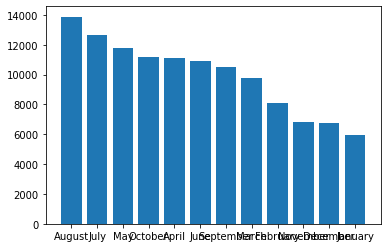

In [31]:
plt.bar(x, y)
plt.show()

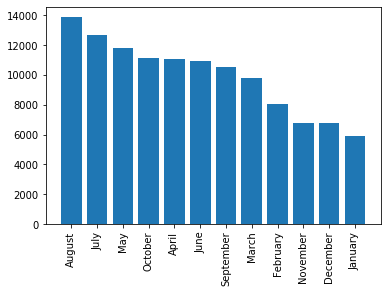

In [32]:
plt.bar(x, y)
plt.xticks(rotation=90)

plt.show()

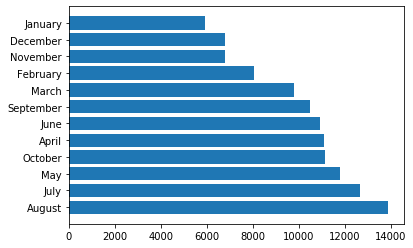

In [33]:
plt.barh(x, y)
plt.show()

## Type Hotel

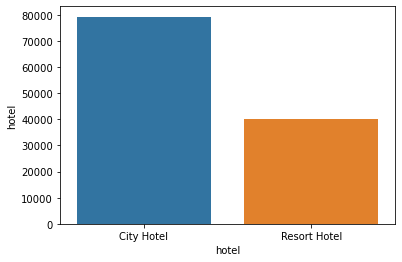

In [17]:
d = df.groupby('hotel')['hotel'].count()
sns.barplot(x=d.index, y=d)
plt.show()

In [26]:
hotel_index = df['hotel'].value_counts().index
hotel_value = df['hotel'].value_counts().values

In [43]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

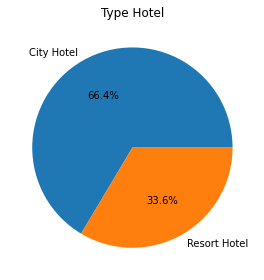

In [28]:
plt.pie(hotel_value, labels=hotel_index, autopct = '%1.1f%%')

plt.title("Type Hotel")
plt.tight_layout()
plt.show()

### type hotel vs is_canceled

In [46]:
xx = df.hotel[df.is_canceled==0].value_counts()
xx

City Hotel      46228
Resort Hotel    28938
Name: hotel, dtype: int64

In [47]:
yy = df.hotel[df.is_canceled==1].value_counts()
yy

City Hotel      33102
Resort Hotel    11122
Name: hotel, dtype: int64

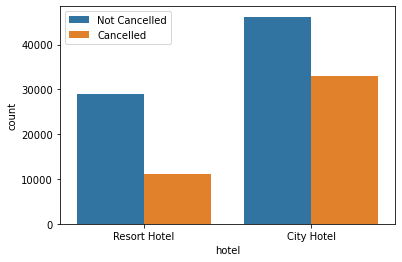

In [45]:
ax = sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()


### country

In [51]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [52]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

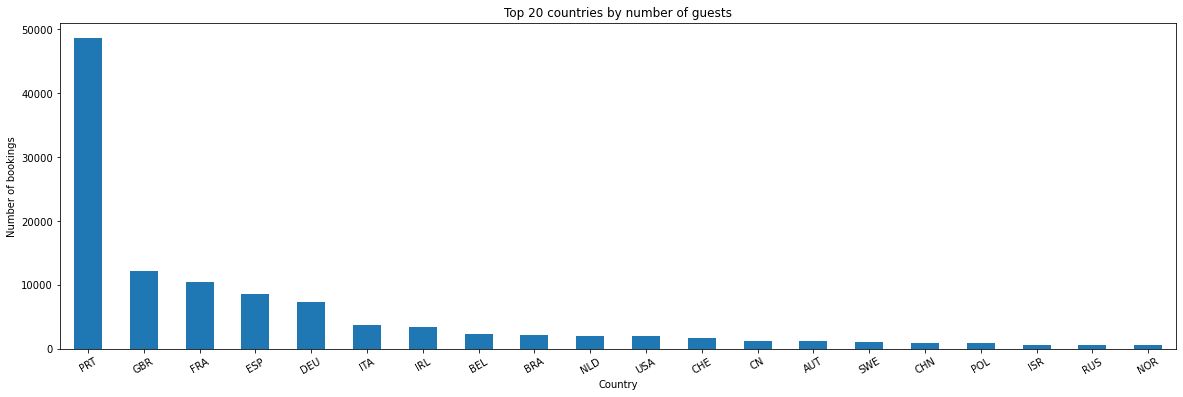

In [53]:
plt.figure(figsize=(20,6))
d.sort_values(ascending=False)[:20].plot(kind='bar')
p = plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("Number of bookings")
plt.title("Top 20 countries by number of guests")
plt.show()

source : https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes

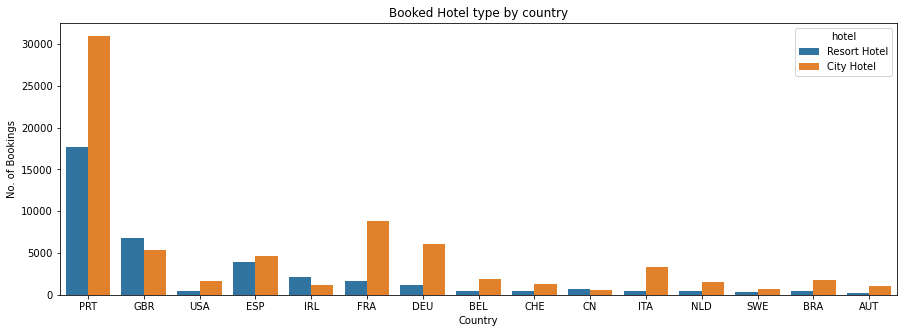

In [54]:
d = df['country'].value_counts().sort_values(ascending=False)[:15]
plt.figure(figsize=(15,5))
sns.countplot(x='country', hue='hotel', data=df[df['country'].isin(d.index)])
plt.xlabel("Country")
plt.ylabel("No. of Bookings")
plt.title("Booked Hotel type by country")
plt.show()

## Daily Rate by Hotel type

In [55]:
df['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

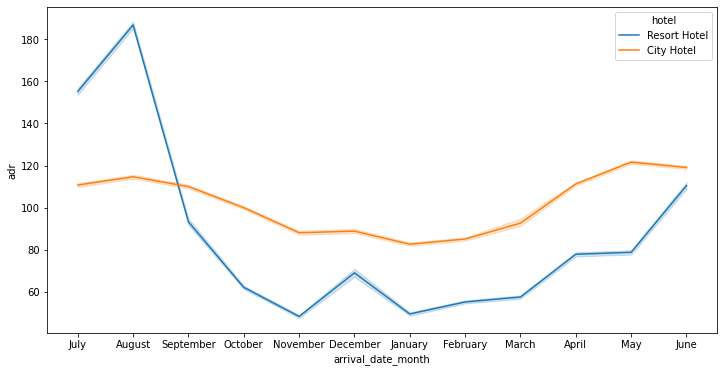

In [56]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()


Untuk hotel resor, tarif harian rata-rata lebih mahal selama Agustus, Juli dan September.

Untuk hotel kota, tarif harian rata-rata lebih mahal selama Agustus, Juli, Juni dan Mei

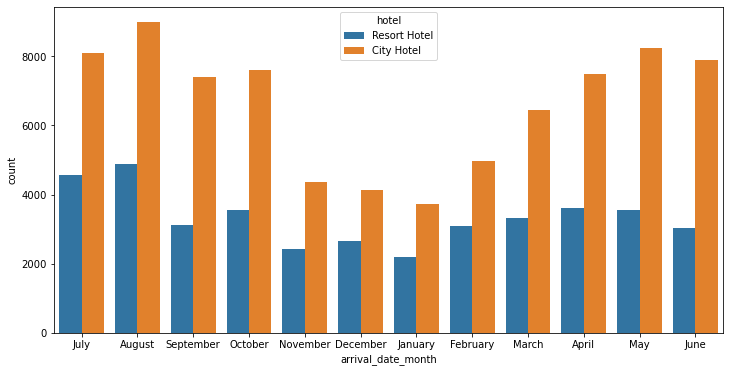

In [65]:
plt.figure(figsize=(12,6))
sns.countplot(x='arrival_date_month', hue='hotel', data= df)
plt.show()

### market segment

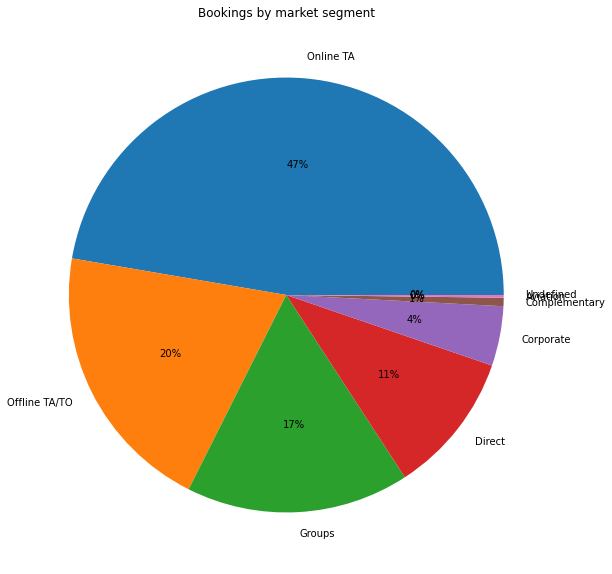

In [57]:
d = df['market_segment'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Bookings by market segment")
plt.show()

Hampir setengah dari pemesanan dilakukan melalui Online Travel Agents (TA). Lebih dari 90% pemesanan dilakukan oleh TA Online, TA/TO Offline, Grup & Langsung.

### Percentage of bookings with meals

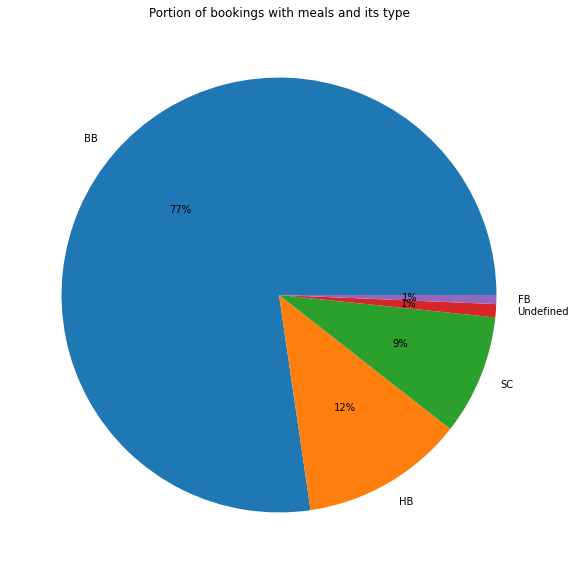

In [59]:
d = df['meal'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Portion of bookings with meals and its type")
plt.show()

### special request

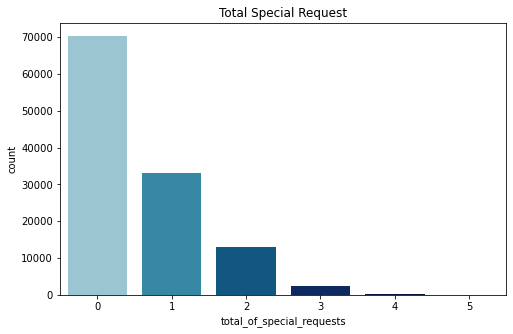

In [67]:
plt.figure(figsize=(8,5))
sns.countplot(x='total_of_special_requests', data=df, palette = 'ocean_r')
plt.title('Total Special Request')
plt.show()

### special request by country

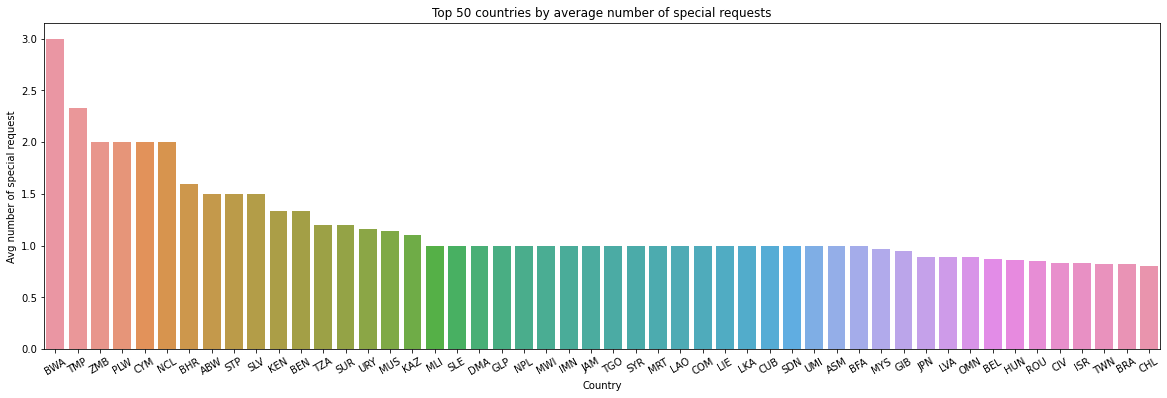

In [60]:
d = df.groupby("country")['total_of_special_requests'].mean().sort_values(ascending=False)[:50]
plt.figure(figsize=(20,6))
sns.barplot(x=d.index, y=d)
p = plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("Avg number of special request")
plt.title("Top 50 countries by average number of special requests")
plt.show()

### Average Special Requests made per guest across months in a year

In [62]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

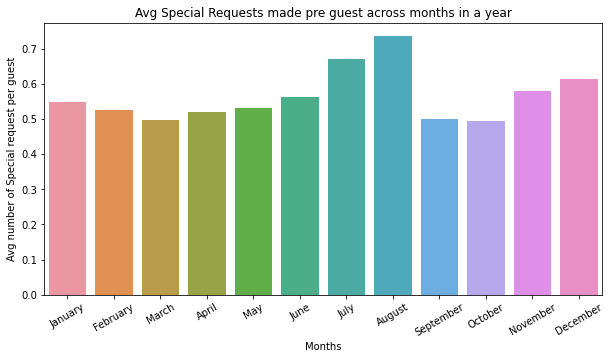

In [63]:
d = df.groupby('arrival_date_month')['total_of_special_requests'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=d.index, y=d, order=months)
p = plt.xticks(rotation=30)
plt.xlabel("Months")
plt.ylabel("Avg number of Special request per guest")
plt.title("Avg Special Requests made pre guest across months in a year")
plt.show()

### Room Types

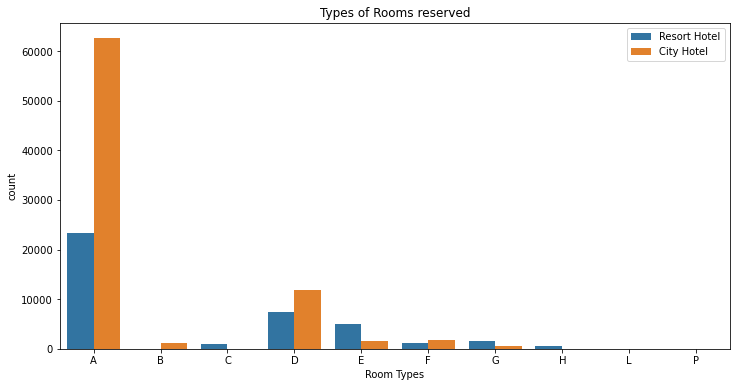

In [64]:
plt.figure(figsize = (12,6))
sns.countplot(x='reserved_room_type', hue='hotel', data=df, order=sorted(df['reserved_room_type'].unique()))
plt.xlabel("Room Types")
plt.legend(loc=1)
plt.title("Types of Rooms reserved")
plt.show()

### Cancellations by type of Guests (Repeated/NonRepeated)

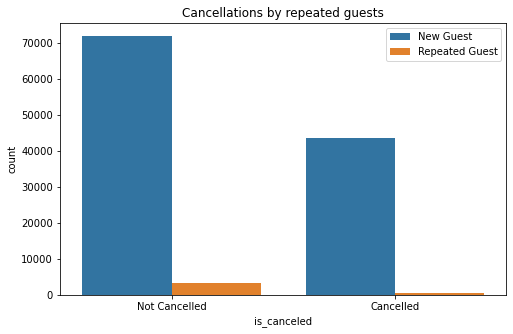

In [70]:
plt.figure(figsize=(8,5))
sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = df)
plt.legend(['New Guest', 'Repeated Guest'])
plt.xticks(ticks=[0,1], labels=['Not Cancelled', 'Cancelled'])
plt.title("Cancellations by repeated guests")
plt.show()

## Kesimpulan

Sebagian besar tamu datang dari negara-negara Portugal, Britania Raya, Spanyol, dan Prancis.

Ada perbedaan besar pada kategori Bed&Breakfast dan lainnya. Hampir 80% pemesanan dipesan untuk Bed&Breakfast.

Sekitar 55% dari pemesanan tidak memiliki permintaan khusus.

Hotel City memiliki lebih banyak tamu selama musim semi dan musim gugur, ketika harga juga tertinggi.

Jumlah tamu untuk hotel Resort turun sedikit dari Agustus hingga September, yang juga merupakan saat harga tertinggi.
Kedua hotel memiliki tamu paling sedikit selama musim dingin.